In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def create_bell_state():
    """生成一个贝尔态 |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)"""
    # 使用向量表示 |00⟩ 和 |11⟩ 的叠加
    return np.array([1, 0, 0, 1]) / np.sqrt(2)



In [3]:
def measure_in_z_basis(state):
    """在Z基上测量一个量子态"""
    # 因为状态向量是 [1/sqrt(2), 0, 0, 1/sqrt(2)]，我们关心的索引是 0 和 3 (|00⟩ 和 |11⟩)
    probabilities = np.abs(state[[0, 3]])**2  # 选择第1个和第4个元素
    # 模拟测量结果
    result = np.random.choice(['00', '11'], p=probabilities)
    return result

def measure_in_x_basis(state):
    """在X基上测量一个量子态"""
    # Hadamard门变换每个量子比特
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
    # 变换到X基
    state_x_basis = np.kron(H, H).dot(state)
    # 概率密度 |amplitude|^2
    probabilities = np.abs(state_x_basis)**2
    # 模拟测量结果
    result = np.random.choice(['00', '01', '10', '11'], p=probabilities)
    return result


def measure(qubit, basis):
    if basis == 'Z':
        # Z-basis: |0⟩ and |1⟩
        #probabilities = [np.abs(qubit[0])**2, np.abs(qubit[3])**2]
        result = measure_in_z_basis(qubit)
    elif basis == 'X':
        # X-basis: |+⟩ = (|0⟩ + |1⟩)/√2 and |−⟩ = (|0⟩ − |1⟩)/√2
        #plus_state = (qubit[0] + qubit[3]) / np.sqrt(2)
        #minus_state = (qubit[0] - qubit[3]) / np.sqrt(2)
        #probabilities = [np.abs(plus_state)**2, np.abs(minus_state)**2]
        result = measure_in_x_basis(qubit)
    
    #result = np.random.choice([0, 1], p=probabilities)
    return result




In [4]:
def simulate_communication(num_bits, with_eve=False):
    bases = ['Z', 'X']
    alice_bases = np.random.choice(bases, num_bits)
    bob_bases = np.random.choice(bases, num_bits)
    
    alice_results = []
    bob_results = []
    
    for i in range(num_bits):
        #qubit = create_entangled_pair()
        qubit = create_bell_state()
        alice_result = measure(qubit, alice_bases[i])
        bob_result = measure(qubit, bob_bases[i])
        
        # Eve intercepts the communication
        if with_eve:
            eve_basis = np.random.choice(bases)
            eve_result = measure(qubit, eve_basis)
            # If Eve's basis matches Bob's, she sends the result she got to Bob
            if eve_basis == bob_bases[i]:
                bob_result = eve_result
        
        alice_results.append(alice_result)
        bob_results.append(bob_result)
    
    return alice_bases, bob_bases, alice_results, bob_results


In [34]:
def calculate_qber(alice_bases, bob_bases, alice_results, bob_results):
    matching_bases_indices = np.where(alice_bases == bob_bases)[0]
    matching_bases_count = len(matching_bases_indices)
    
    if matching_bases_count == 0:
        return 0, 0
    
    error_count = sum(alice_results[i] != bob_results[i] for i in matching_bases_indices)
    
    qber = error_count / matching_bases_count
    key_generation_rate = matching_bases_count / len(alice_bases)
    
    return qber, key_generation_rate


QBER without Eve: 53.12%
QBER with Eve: 51.57%


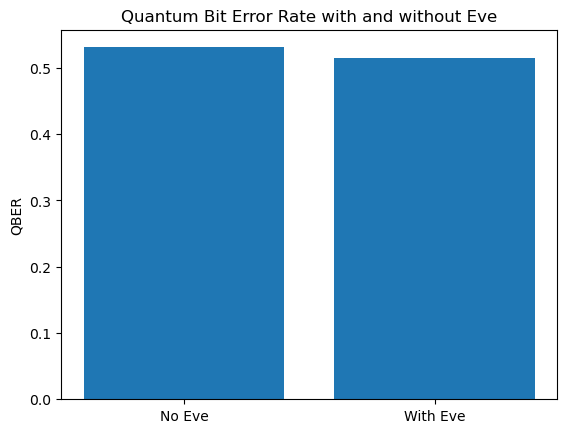

In [35]:
def run_simulation(num_bits, num_trials):
    qber_no_eve = []
    qber_with_eve = []
    
    for _ in range(num_trials):
        alice_bases, bob_bases, alice_results, bob_results = simulate_communication(num_bits, with_eve=False)
        qber, _ = calculate_qber(alice_bases, bob_bases, alice_results, bob_results)
        qber_no_eve.append(qber)
        
        alice_bases, bob_bases, alice_results, bob_results = simulate_communication(num_bits, with_eve=True)
        qber, _ = calculate_qber(alice_bases, bob_bases, alice_results, bob_results)
        qber_with_eve.append(qber)
    
    return np.mean(qber_no_eve), np.mean(qber_with_eve)

# Simulate
num_bits = 1000
num_trials = 1

qber_no_eve, qber_with_eve = run_simulation(num_bits, num_trials)

print(f'QBER without Eve: {qber_no_eve * 100:.2f}%')
print(f'QBER with Eve: {qber_with_eve * 100:.2f}%')

# Plotting
labels = ['No Eve', 'With Eve']
qber_values = [qber_no_eve, qber_with_eve]

plt.bar(labels, qber_values)
plt.ylabel('QBER')
plt.title('Quantum Bit Error Rate with and without Eve')
plt.show()


In [34]:
def measure(qubit, basis):
    if basis == 'Z':
        # Z-basis: |0⟩ and |1⟩
        probabilities = [np.abs(qubit[0])**2, np.abs(qubit[3])**2]
    elif basis == 'X':
        # Proper X-basis measurement
        H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Hadamard matrix
        plus_state = (qubit[0] + qubit[3]) / np.sqrt(2)
        minus_state = (qubit[0] - qubit[3]) / np.sqrt(2)
        probabilities = [np.abs(plus_state)**2, np.abs(minus_state)**2]
        # Ensure numerical stability
        #probabilities = np.clip(probabilities, 0, 1)
    
    result = np.random.choice([0, 1], p=probabilities)
    return result

In [35]:
qubit = create_entangled_pair()
alice_result = measure(qubit, 'X')
alice_result

0

In [36]:
import numpy as np

def create_entangled_pair():
    # Bell state: |ψ⟩ = 1/√2 * (|00⟩ + |11⟩)
    return np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

def measure(qubit, basis):
    if basis == 'Z':
        # Z-basis: |0⟩ and |1⟩
        probabilities = [np.abs(qubit[0])**2, np.abs(qubit[3])**2]
    elif basis == 'X':
        # X-basis measurement with Hadamard transformation
        # |+⟩ = 1/√2 * (|0⟩ + |1⟩)
        # |−⟩ = 1/√2 * (|0⟩ - |1⟩)
        plus_state = (qubit[0] + qubit[3]) / np.sqrt(2)
        minus_state = (qubit[0] - qubit[3]) / np.sqrt(2)
        probabilities = [np.abs(plus_state)**2, np.abs(minus_state)**2]
    
    # Numerical stability check
    probabilities = np.clip(probabilities, 0, 1)
    
    # Randomly choose the result based on the calculated probabilities
    result = np.random.choice([0, 1], p=probabilities)
    return result

In [41]:
# Create an entangled pair
qubit = create_entangled_pair()

# Measure in Z-basis
z_result = measure(qubit, 'Z')
print(f"Z-basis result: {z_result}")

# Measure in X-basis
x_result = measure(qubit, 'X')
print(f"X-basis result: {x_result}")


Z-basis result: 0
X-basis result: 0


In [5]:
import numpy as np

def create_entangled_pair():
    # Entangled state: |ψ⟩ = 1/√2 * (|00⟩ + |11⟩)
    return np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])


def measure(qubit, basis):
    if basis == 'Z':
        # Z-basis measurement, using standard basis vectors
        probabilities = [np.abs(qubit[0])**2, np.abs(qubit[3])**2]
    
    elif basis == 'X':
        # Apply Hadamard transform to convert to X-basis
        hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
        
        # Since qubit is in a 4-dimensional state vector, we perform the Hadamard transform
        # on each qubit of the entangled pair.
        qubit_A = qubit[:2]  # |ψ⟩_A
        qubit_B = qubit[2:]  # |ψ⟩_B

        # Apply Hadamard transform to each qubit
        transformed_A = hadamard @ qubit_A
        transformed_B = hadamard @ qubit_B

        # The new state after applying Hadamard transform
        transformed_state = np.kron(transformed_A, transformed_B)
        
        # Measurement probabilities in X-basis
        probabilities = [np.abs(transformed_state[0])**2, np.abs(transformed_state[3])**2]
        print(probabilities)
    else:
        raise ValueError("Unknown basis. Supported bases: 'Z', 'X'.")
    
    # Randomly choose the measurement result based on the calculated probabilities
    result = np.random.choice([0, 1], p=probabilities)
    return result

# 测试这个函数
qubit = create_entangled_pair()
print(f"Z 基测量结果: {measure(qubit, 'Z')}")
print(f"X 基测量结果: {measure(qubit, 'X')}")


Z 基测量结果: 1
[0.062499999999999944, 0.062499999999999944]


ValueError: probabilities do not sum to 1

In [9]:
from qiskit import QuantumCircuit
#from qiskit.providers.aer import Aer
#from qiskit.execute import execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [11]:
from qiskit import execute, Aer

ImportError: cannot import name 'Aer' from 'qiskit' (E:\anaconda3\Lib\site-packages\qiskit\__init__.py)

In [17]:
import numpy as np

def create_bell_state():
    """Generate a Bell state |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)."""
    return np.array([1, 0, 0, 1]) / np.sqrt(2)

def hadamard_transform(state):
    """Apply the Hadamard transform to a quantum state."""
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
    return np.kron(H, H).dot(state)

def measure_state(state, basis_a, basis_b):
    """Measure a state in given bases for Alice and Bob."""
    # Apply basis transformations
    if basis_a == 'X':
        state = np.kron(np.array([[1, 1], [1, -1]]) / np.sqrt(2), np.eye(2)).dot(state)
    if basis_b == 'X':
        state = np.kron(np.eye(2), np.array([[1, 1], [1, -1]]) / np.sqrt(2)).dot(state)

    # Measure the state in the computational basis
    probabilities = np.abs(state)**2
    results = ['00', '01', '10', '11']
    result_index = np.random.choice(len(results), p=probabilities)
    return results[result_index]

# Generate a Bell state
bell_state = create_bell_state()

# Measure in same and different bases
result_zz = measure_state(bell_state, 'Z', 'Z')  # Both Z
result_xx = measure_state(hadamard_transform(bell_state), 'X', 'X')  # Both X
result_zx = measure_state(bell_state, 'Z', 'X')  # Alice Z, Bob X
result_xz = measure_state(bell_state, 'X', 'Z')  # Alice X, Bob Z

# Print results
print("Both Z basis - Result: ", result_zz)
print("Both X basis - Result: ", result_xx)
print("Alice Z, Bob X - Result: ", result_zx)
print("Alice X, Bob Z - Result: ", result_xz)


Both Z basis - Result:  00
Both X basis - Result:  11
Alice Z, Bob X - Result:  00
Alice X, Bob Z - Result:  00


In [31]:
import numpy as np

def eavesdrop(state):
    """Simulate Eve's random measurement in either the Z or X basis, collapsing the state."""
    basis = np.random.choice(['Z', 'X'])
    if basis == 'Z':
        # Eve measures in Z basis, resulting state collapses to |00⟩ or |11⟩
        result = np.random.choice(['00', '11'])
        index = {'00': 0, '11': 3}[result]
    else:
        # Eve measures in X basis, resulting state collapses to |++⟩ or |--⟩
        result = np.random.choice(['++', '--'])
        # State in X basis, results correlated as |++⟩ = (|00⟩ + |01⟩ + |10⟩ + |11⟩) / 2
        #                              |--⟩ = (|00⟩ - |01⟩ - |10⟩ + |11⟩) / 2
        if result == '++':
            new_state = np.array([1, 1, 1, 1]) / 2
        else:
            new_state = np.array([1, -1, -1, 1]) / 2
        # Convert back to the standard basis if necessary
        H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
        state = np.kron(H, H).dot(new_state)  # Apply inverse Hadamard to both qubits
        probabilities = np.abs(state)**2
        result_index = np.random.choice(len(probabilities), p=probabilities)
        new_state = np.zeros(4)
        new_state[result_index] = 1
        return new_state

    # Collapse the original state based on Eve's measurement
    new_state = np.zeros(4)
    new_state[index] = 1
    return new_state

# Example usage
bell_state = np.array([1, 0, 0, 1]) / np.sqrt(2)  # Create a Bell state
state_post_eve = eavesdrop(bell_state)  # Eve eavesdrops
print(state_post_eve)


[1. 0. 0. 0.]


In [50]:
import numpy as np

def create_bell_state():
    """Generate a Bell state |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)."""
    return np.array([1, 0, 0, 1]) / np.sqrt(2)

def hadamard_transform(state):
    """Apply the Hadamard transform to a quantum state."""
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
    return np.kron(H, H).dot(state)

def eavesdrop(state):
    """Simulate Eve's random measurement in either the Z or X basis, collapsing the state."""
    basis = np.random.choice(['Z', 'X'])
    if basis == 'Z':
        # Eve measures in Z basis, resulting state collapses to |00⟩ or |11⟩
        result = np.random.choice(['00', '11'])
        index = {'00': 0, '11': 3}[result]
    else:
        # Eve measures in X basis, resulting state collapses to |++⟩ or |--⟩
        result = np.random.choice(['++', '--'])
        # State in X basis, results correlated as |++⟩ = (|00⟩ + |01⟩ + |10⟩ + |11⟩) / 2
        #                              |--⟩ = (|00⟩ - |01⟩ - |10⟩ + |11⟩) / 2
        if result == '++':
            new_state = np.array([1, 1, 1, 1]) / 2
        else:
            new_state = np.array([1, -1, -1, 1]) / 2
        # Convert back to the standard basis if necessary
        H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
        state = np.kron(H, H).dot(new_state)  # Apply inverse Hadamard to both qubits
        probabilities = np.abs(state)**2
        result_index = np.random.choice(len(probabilities), p=probabilities)
        new_state = np.zeros(4)
        new_state[result_index] = 1
        return new_state

    # Collapse the original state based on Eve's measurement
    new_state = np.zeros(4)
    new_state[index] = 1
    return new_state



def measure_state(state, basis_a, basis_b):
    """Measure a state in given bases for Alice and Bob."""
    if basis_a == 'X':
        state = np.kron(np.array([[1, 1], [1, -1]]) / np.sqrt(2), np.eye(2)).dot(state)
    if basis_b == 'X':
        state = np.kron(np.eye(2), np.array([[1, 1], [1, -1]]) / np.sqrt(2)).dot(state)
    probabilities = np.abs(state)**2
    results = ['00', '01', '10', '11']
    result_index = np.random.choice(len(results), p=probabilities)
    return results[result_index]


# Generate a Bell state
bell_state = create_bell_state()

# Measure without eavesdropping
result_no_eve = measure_state(bell_state, 'Z', 'Z')

# Introduce eavesdropping
state_post_eve = eavesdrop(bell_state)
result_with_eve = measure_state(state_post_eve, 'Z', 'Z')

# Print results
print("Without Eve - Result: ", result_no_eve)
print("With Eve - Result: ", result_with_eve)


Without Eve - Result:  00
With Eve - Result:  00


In [46]:
import numpy as np

def create_bell_state():
    """Generate a Bell state |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)."""
    return np.array([1, 0, 0, 1]) / np.sqrt(2)

def hadamard_transform(state):
    """Apply the Hadamard transform to a quantum state."""
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
    return np.kron(H, H).dot(state)

def measure_state(state, basis_a, basis_b):
    """Measure a state in given bases for Alice and Bob."""
    # Apply basis transformations
    if basis_a == 'X':
        state = np.kron(np.array([[1, 1], [1, -1]]) / np.sqrt(2), np.eye(2)).dot(state)
    if basis_b == 'X':
        state = np.kron(np.eye(2), np.array([[1, 1], [1, -1]]) / np.sqrt(2)).dot(state)

    # Measure the state in the computational basis
    probabilities = np.abs(state)**2
    results = ['00', '01', '10', '11']
    result_index = np.random.choice(len(results), p=probabilities)
    return results[result_index]

# Generate a Bell state
bell_state = create_bell_state()

# Measure in same and different bases
result_zz = measure_state(bell_state, 'Z', 'Z')  # Both Z
result_xx = measure_state(hadamard_transform(bell_state), 'X', 'X')  # Both X
result_zx = measure_state(bell_state, 'Z', 'X')  # Alice Z, Bob X
result_xz = measure_state(bell_state, 'X', 'Z')  # Alice X, Bob Z

# Print results
print("Both Z basis - Result: ", result_zz)
print("Both X basis - Result: ", result_xx)
print("Alice Z, Bob X - Result: ", result_zx)
print("Alice X, Bob Z - Result: ", result_xz)


Both Z basis - Result:  11
Both X basis - Result:  11
Alice Z, Bob X - Result:  11
Alice X, Bob Z - Result:  11


In [18]:
import numpy as np


import numpy as np

def create_bell_state():
    """Generate a Bell state |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)."""
    return np.array([1, 0, 0, 1]) / np.sqrt(2)

def hadamard_transform(state):
    """Apply the Hadamard transform to a quantum state."""
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
    return np.kron(H, H).dot(state)

def eavesdrop(state):
    """Simulate Eve's random measurement in either the Z or X basis, affecting entanglement."""
    basis = np.random.choice(['Z', 'X'])
    if basis == 'Z':
        # Eve measures in Z basis, resulting state collapses randomly to |0⟩ or |1⟩ for one qubit
        if np.random.rand() > 0.5:
            # Collapse Alice's qubit to |0⟩
            state = np.array([1, 0, 0, 0]) if np.random.rand() > 0.5 else np.array([0, 1, 0, 0])
        else:
            # Collapse Alice's qubit to |1⟩
            state = np.array([0, 0, 1, 0]) if np.random.rand() > 0.5 else np.array([0, 0, 0, 1])
    else:
        # Eve measures in X basis, similarly collapse Alice's qubit randomly
        H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
        plus_state = np.array([1, 1, 1, 1]) / 2 if np.random.rand() > 0.5 else np.array([1, -1, 1, -1]) / 2
        minus_state = np.array([1, 1, -1, -1]) / 2 if np.random.rand() > 0.5 else np.array([1, -1, -1, 1]) / 2
        state = np.kron(H, np.eye(2)).dot(plus_state if np.random.rand() > 0.5 else minus_state)
    return state

def measure_state(state, basis_a, basis_b):
    """Measure a state in given bases for Alice and Bob."""
    if basis_a == 'X':
        state = np.kron(np.array([[1, 1], [1, -1]]) / np.sqrt(2), np.eye(2)).dot(state)
    if basis_b == 'X':
        state = np.kron(np.eye(2), np.array([[1, 1], [1, -1]]) / np.sqrt(2)).dot(state)
    probabilities = np.abs(state)**2
    results = ['00', '01', '10', '11']
    result_index = np.random.choice(len(results), p=probabilities)
    return results[result_index]


# Generate a Bell state
bell_state = create_bell_state()

# Measure without eavesdropping
result_no_eve = measure_state(bell_state, 'X', 'Z')

# Introduce eavesdropping
state_post_eve = eavesdrop(bell_state)
result_with_eve = measure_state(state_post_eve, 'X', 'Z')

# Print results
print("Without Eve - Result: ", result_no_eve)
print("With Eve - Result: ", result_with_eve)

Without Eve - Result:  01
With Eve - Result:  01


In [43]:
import numpy as np

def create_bell_state():
    """Generate a Bell state |Φ+⟩ = (|00⟩ + |11⟩) / sqrt(2)."""
    return np.array([1, 0, 0, 1]) / np.sqrt(2)

def apply_noise(state, snr, loss):
    """Apply thermal noise and loss to the quantum state."""
    noise = np.random.normal(0, 1/snr, size=state.shape)  # Gaussian noise based on SNR
    loss_factor = np.exp(-loss)  # Exponential decay to simulate photon loss
    return state * loss_factor + noise

def measure_state(state):
    """Measure the quantum state in the computational basis."""
    probabilities = np.abs(state)**2
    probabilities /= np.sum(probabilities)  # Normalize probabilities
    results = ['00', '01', '10', '11']
    result_index = np.random.choice(len(results), p=probabilities)
    return results[result_index]

# Simulation parameters
snr = 0.0001  # Signal to noise ratio, higher is better
loss = 0.5  # Loss factor, higher means more loss

# Generate a Bell state
bell_state = create_bell_state()

# Apply noise and loss to the state
noisy_state = apply_noise(bell_state, snr, loss)

# Measure the state
measurement_result = measure_state(noisy_state)
print("Measurement result:", measurement_result)


Measurement result: 00
